## COMP 6934 | Project 01
**Team Members:**<br>
Mehadi Hassan (202287115) <br>
Mohammad Shehabul Islam (202196528) <br>
**Submission Date**: March 10, 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import circlify

In [2]:
df = pd.read_csv('tickets.csv', index_col='ticket_type', parse_dates=['creation_date','view_date','action_date'])
df = df.reset_index()

In [4]:
df_grouped_team = df.groupby("user_team")["customer_satisfaction"].mean().reset_index()
df_grouped_team = (
    df.groupby("user_team")["customer_satisfaction"]
    .agg(["mean", "count"])
    .reset_index()
)
df_grouped_team.columns = ["user_team", "customer_satisfaction", "problem_solved"]

df_grouped_user = df.groupby("user_actioned")["customer_satisfaction"].mean().reset_index()
df_grouped_user = (
    df_grouped_user.merge(
        df[["user_actioned", "user_team"]], on="user_actioned", how="left"
    )
    .drop_duplicates()
    .reset_index()
)

In [5]:
data = [
    {
        "id": row["user_team"],
        "datum": row["customer_satisfaction"],
        "children": [
            {
                "id": row_user["user_actioned"],
                "datum": row_user["customer_satisfaction"],
                "team": row["user_team"],
            }
            for _, row_user in df_grouped_user.iterrows()
            if row["user_team"] == row_user["user_team"]
        ],
    }
    for _, row in df_grouped_team.iterrows()
]

In [6]:
def get_colors(labels):
    if labels == "blue":
        return "#5DADE2"
    if labels == "green":
        return "#28B463"
    if labels == "red":
        return "#A93226"
    if labels == "orange":
        return "#FC7819"

unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored
unexpected key 'team' in input is ignored


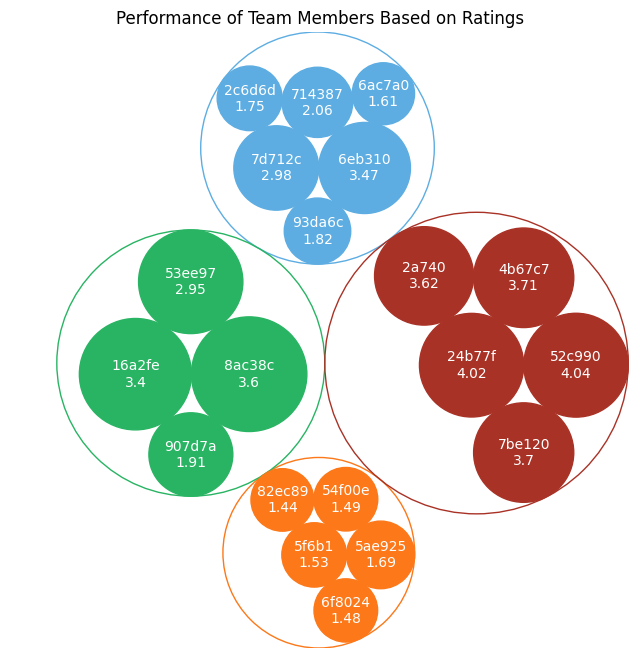

In [7]:
circles = circlify.circlify(data, show_enclosure=False)

fig, ax = plt.subplots(figsize=(8, 8))

max_value = max(
    max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles
)

for circle in circles:
    x, y, r = circle
    if circle.level == 1:
        ax.add_patch(
            plt.Circle(
                (x, y), r, linewidth=1, fill=False, color=get_colors(circle.ex["id"])
            )
        )
        
    else:
        ax.add_patch(
            plt.Circle(
                (x, y),
                r,
                fill=True,
                edgecolor=get_colors(circle.ex["team"]),
                facecolor=get_colors(circle.ex["team"]),
            )
        )

        plt.annotate(
            (circle.ex["id"]+ "\n" + str(round(circle.ex["datum"], 2))),
            (x, y),
            va="center",
            ha="center",
            color="white",
        )
ax.set_title('Performance of Team Members Based on Ratings')
ax.set_axis_off()
ax.set_xlim(-max_value, max_value)
ax.set_ylim(-max_value, max_value)
plt.show()

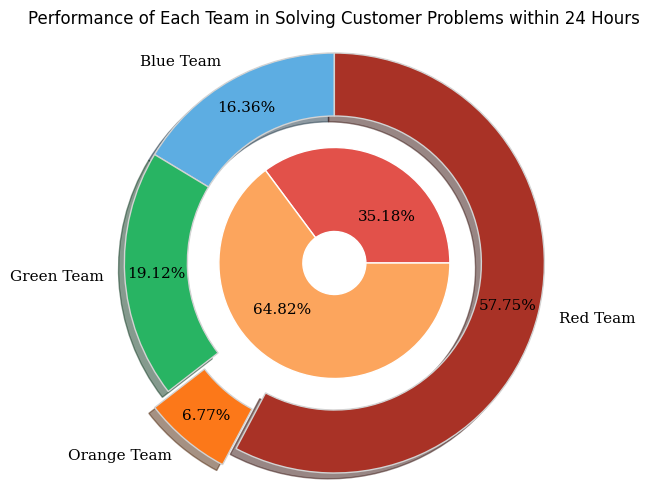

In [8]:
resolved_within_24_hours = df[df['customer_problem_resolved'] &
                              ((pd.to_datetime(df['action_date']) - pd.to_datetime(df['creation_date'])) <= pd.Timedelta(24, 'hours'))]
sizes = resolved_within_24_hours.groupby('user_team').size().values


teams = ['Blue Team', 'Green Team', 'Orange Team', 'Red Team']
labels_dict = dict(zip(teams, sizes))
explode = (0, 0, 0.1, 0)


percentage_resolved_within_24_hours = (len(resolved_within_24_hours) / len(df)) * 100
percentage_not_resolved_within_24_hours = 100 - percentage_resolved_within_24_hours


fig, ax = plt.subplots(figsize=(8, 6))


outer_circle = ax.pie(sizes,
                      labels=labels_dict.keys(),
                      autopct='%1.2f%%',
                      startangle=90,
                      pctdistance=0.85,  # distance from center
                      explode=explode,
                      shadow=True,
                      colors=['#5DADE2', '#28B463', '#FC7819', '#A93226'],
                      wedgeprops=dict(width=0.3, edgecolor='lightgrey'),  # width of the donut
                      textprops={'fontsize': 11, 'family': 'serif', 'color': '#000000'})


inner_circle_radius = 0.55
inner_circle = plt.Circle((0, 0), inner_circle_radius, color='white')
ax.add_artist(inner_circle)


inner_pie_labels = [f'{percentage_resolved_within_24_hours:.2f}%', f'{percentage_not_resolved_within_24_hours:.2f}%']
ax.pie([percentage_resolved_within_24_hours, percentage_not_resolved_within_24_hours],
       colors=sns.color_palette('Spectral'),  # Green and Red colors
       radius=inner_circle_radius,
       wedgeprops=dict(width=0.4, edgecolor='white'),
       labels=inner_pie_labels,
       labeldistance=0.45,  # Adjust label distance from center to make it closer
       textprops={'fontsize': 11, 'color': 'black', 'family': 'serif'})

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
ax.set_title('Performance of Each Team in Solving Customer Problems within 24 Hours')

plt.show()

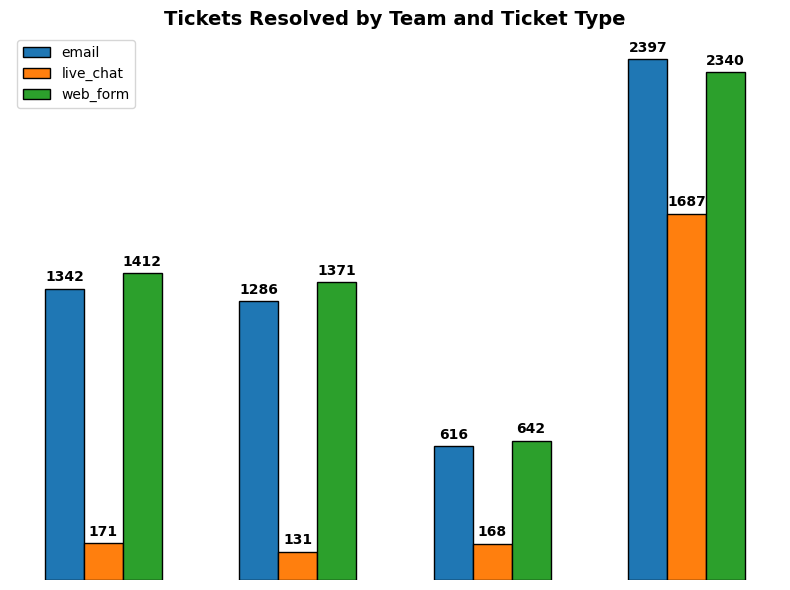

In [9]:

df = pd.read_csv('tickets.csv', index_col='ticket_type', parse_dates=['creation_date', 'view_date', 'action_date'])

ticket_type_counts = df.groupby(['user_team', 'ticket_type'])['customer_problem_resolved'].sum().unstack(fill_value=0)
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

team_names = ['Blue Team', 'Green Team', 'Orange Team', 'Red Team']


fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.2
index = np.arange(len(ticket_type_counts))

for i, ticket_type in enumerate(ticket_type_counts.columns):
    bars = ax.bar(index + i * bar_width, ticket_type_counts[ticket_type], bar_width, color=custom_colors[i], label=ticket_type,
                  edgecolor='black', linewidth=1)


    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, color='black', fontweight='bold')


ax.set_xticks(index + bar_width * (len(ticket_type_counts.columns) - 1) / 2)
ax.set_xticklabels(team_names, ha='center', fontsize=12)

# ax.set_ylabel('Number of Tickets Resolved', fontsize=12)
ax.set_title('Tickets Resolved by Team and Ticket Type', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.set_yticklabels([])

ax.set_axis_off()

plt.tight_layout()
plt.show()


### Acknowledgement

This assignment was completed by following the lecture materials provided in the course and the library documentations of Numpy, Pandas, Matplotlib, Seaborn and Circlify.

For the circlify library the following external resource was used - https://python-graph-gallery.com/circular-packing-1-level-hierarchy/

N.B: Only the essential cells for the assignment has been kept and I have removed all the cells where I did initial analysis on data such as `info`, `describe`, `head`, `tail` and so on.